#### BackPropagation
Carlos Garcia - 21000475

<img src="./imgs/red.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([[3, 10]], dtype = 'float')
x.shape

In [ ]:
h3 = np.array([
               [-0.23, 0.22, 0.77],
               [0.9, 0.88, -0.4]
            ])


h2 = np.array([
               [-0.3, 0.62, 0.45],
               [0.45, 0.57, 0.48],
               [0.65, 0.58, -0.45]
            ])

h1 = np.array([
               [0.3, 0.46, 0.02],
               [0.22, -0.7, 0.65],
               [0.65, 0.9, 0.34]
            ])

In [ ]:
delta_h3 = np.matmul(x, h3)
delta_h2 = np.matmul(delta_h3, h2)
delta_h1 = np.matmul(delta_h2, h1)

In [ ]:
layers = [delta_h3, delta_h2, delta_h1]
i = 3
for layer in layers:
    n = np.argmax(layer.flatten())
    print('\nHidden Layer {} ---------------'.format(i))
    print(layer)
    print('Neuron with most error is: {}'.format(n+1))
    i -= 1

### XOR con ANN

##### Forward functions

In [2]:
def append_bias(x):
    return np.hstack((x, np.ones((x.shape[0], 1))))

In [3]:
def relu(x):
    return np.where(x >= 0.0, x, 0.0)    

In [278]:
def initialize_weights(input_features, layers):
    #layers contain the number of layers neurons and is equal to the length of hidden + output layers
    weights = dict()
    bias = 1
    neurons = input_features + bias
    for l in range(1, len(layers) + 1):
        weights['W{}'.format(l)] = np.random.normal(loc = 0, scale = 0.5, size = (neurons, layers[l-1]))
        neurons = layers[l-1] + bias        
        
    return weights  

In [257]:
def getCost(y_hat, y_real):
    return 1/2 * np.mean(np.power(y_hat - y_real, 2))

##### Backpropagation

In [246]:
def relu_prime(x):
    return np.where(x >= 0, 1.0, 0.0) 

In [247]:
def cost_derivative(y_hat, y):
    #Remember y_hat is just the output activation of a layer
    return y_hat - y

##### Network definition

In [51]:
def train_network(X, Y, epochs, lr): 
    costs = []
    weights = initialize_weights(X.shape[1], [8,2,1])
    for epoch in range(1, epochs + 1):
        zs, activations = forward_propagation(X, weights)
        costs.append(getCost(activations[-1], Y)) 
        nabla_w = backward_propagation(zs, activations, y, weights)
        for i in range(1, 4):
            weights['W{}'.format(i)] = weights['W{}'.format(i)] - (lr * nabla_w[i - 1])
        
    return weights, activations, costs

In [25]:
def forward_propagation(X, weights):   
    layer = append_bias(X)
    L = len(weights.keys()) #total number of layers
    
    #Cached results
    zs = []
    #activations = []
    activations = [layer] #maybe just X
    
    for l in range(1, L + 1):
        #forward propagation part
        Z = np.matmul(layer, weights['W{}'.format(l)])
        if l < L:
            A = relu(Z)
            Z = append_bias(Z)
            A = append_bias(A)
        else:
            A = Z * 1
        
        zs.append(Z)
        activations.append(A)
        layer = A
        
    return zs, activations

In [26]:
def backward_propagation2(zs, activations, y, W):
    nabla_w = [np.zeros(w.shape) for w in list(W.values())]
    delta = cost_derivative(activations[-1], y) * relu_prime(zs[-1])
    nabla_w[-1] = np.matmul(activations[-2].T, delta)
    for l in range(len(zs)-1, 0, -1):
        delta = delta[:, :-1] if l < len(zs)-1 else delta
        act = activations[l-1][:, :-1]
        print('-------')
        print(delta.shape)
        print(act.shape)
        print(W['W{}'.format(l+1)].shape)
        delta = np.matmul(delta, W['W{}'.format(l+1)].T) * relu_prime(zs[l])
        nabla_w[l-1] = np.matmul(delta.T, act)

    return nabla_w

In [27]:
def backward_propagation(zs, activations, y, W):
    nabla_w = [np.zeros(w.shape) for w in list(W.values())]
    delta = cost_derivative(activations[-1], y) * relu_prime(zs[-1])
    nabla_w[-1] = np.matmul(activations[-2].T, delta)
    for l in range(len(zs)-1, 0, -1):
        delta = delta[:, :-1] if l < len(zs)-1 else delta
        act = activations[l-1]
        #print('-------')
        #print('d ',delta.shape)
        #print('a ',act.shape)
        #print('z ', zs[l].shape)
        #print('w ', W['W{}'.format(l+1)].shape)
        delta = np.matmul(delta, W['W{}'.format(l+1)].T) * relu_prime(zs[l-1])
        #print('d ', delta.shape)
        nabla_w[l-1] = np.matmul(act.T, delta[:, :-1])
        #print('nw ', nabla_w[l-1].shape)

    return nabla_w

##### Run Model

In [279]:
x = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]], dtype = 'float')

y = np.array([0,1,1,0]).reshape(4,1)

print(x)
print(x.shape)
print(y)

[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
(4, 2)
[[0]
 [1]
 [1]
 [0]]


In [280]:
#weights = initialize_weights(x.shape[1], [4,2,1])
#weights

In [295]:
model_params, activations, costs = train_network(x, y, 5, 0.05)

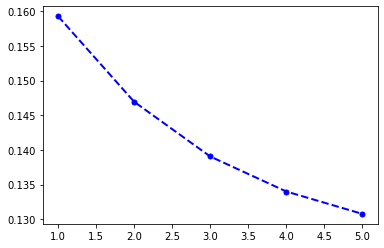

In [296]:
plt.plot(np.arange(1, len(costs)+1), costs, 'bo--', linewidth=2, markersize=5)

In [297]:
costs

[0.15929658918310347,
 0.14694981707718618,
 0.13904788292939918,
 0.13399064507481548,
 0.1307540128478819]

In [298]:
activations

[array([[1., 1., 1.],
        [1., 0., 1.],
        [0., 1., 1.],
        [0., 0., 1.]]),
 array([[2.85296288e-01, 9.36637020e-01, 0.00000000e+00, 2.39025050e-01,
         2.33384093e-01, 2.05442229e-02, 2.77187416e+00, 2.69937113e-01,
         1.00000000e+00],
        [4.81979001e-01, 1.28751447e-03, 1.16373623e-01, 0.00000000e+00,
         8.95445865e-01, 0.00000000e+00, 1.73305334e+00, 5.46392343e-02,
         1.00000000e+00],
        [1.84618496e-01, 1.30963275e+00, 0.00000000e+00, 8.32120126e-01,
         0.00000000e+00, 0.00000000e+00, 1.68492244e+00, 3.01720510e-01,
         1.00000000e+00],
        [3.81301210e-01, 3.74283243e-01, 1.41183708e-01, 8.95922988e-02,
         8.10084690e-02, 0.00000000e+00, 6.46101623e-01, 8.64226314e-02,
         1.00000000e+00]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]),
 array([[0.39272453],
        [0.39272453],
        [0.39272453],
        [0.39272453]])]

In [299]:
model_params

{'W1': array([[ 0.10067779, -0.37299573, -0.02481009, -0.59309508,  0.8144374 ,
          0.09451332,  1.08695171, -0.0317834 ],
        [-0.19668271,  0.93534951, -0.3592604 ,  0.74252783, -0.66206177,
          0.07606146,  1.03882082,  0.21529788],
        [ 0.38130121,  0.37428324,  0.14118371,  0.0895923 ,  0.08100847,
         -0.15003055,  0.64610162,  0.08642263]]),
 'W2': array([[-0.14610836,  0.52627997],
        [ 0.09963979, -0.05312749],
        [-0.07307173, -1.04774433],
        [ 0.14372343,  0.0548624 ],
        [ 0.51664368,  0.28516563],
        [-0.62179143, -0.30388386],
        [-1.0130976 , -0.42369512],
        [-0.03684243,  0.24391173],
        [ 0.04090509, -0.1002511 ]]),
 'W3': array([[0.69878913],
        [0.56585903],
        [0.41417963]])}

In [300]:
model_params['W3']

array([[0.69878913],
       [0.56585903],
       [0.41417963]])

In [301]:
input_layer = append_bias(x)
input_layer

array([[1., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [302]:
linear_combination = np.matmul(append_bias(x), model_params['W3'])
linear_combination

array([[1.67882778],
       [1.11296876],
       [0.98003865],
       [0.41417963]])